In [1]:
import matplotlib.pyplot as plt
import math

In [2]:
from base import *
from game import *
from rules import *
from sim import *

In [18]:
# mg = MultilinearGame(np.array([[[3,0],[5,1]],[[3,5],[0,1]]]))
mg = MultilinearGame(np.random.rand(3,3,3,3))
# learner = ExtraGradient(lr=0.1, proj=proj_sim)
# learner = OptimisticGradient(lr=0.1, proj=proj_sim)
# learner = OFTRL(lr=0.1, proj=proj_sim, barrier=log_barrier)
learner = BlumMansour(OFTRL(lr=0.1, proj=proj_sim, barrier=log_barrier))
sim = GameSim(mg, learner, [None, "swap"])

In [19]:
%%time
sim.play(10000)

CPU times: total: 1min 13s
Wall time: 1min 15s


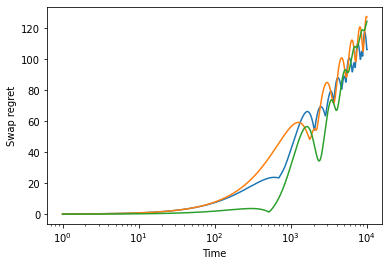

In [30]:
mode: Literal["swap"] | None
mode = "swap"

regrets = np.maximum(sim.regret_recorders[mode](), 0)
plt.plot([(i + 1) for i in range(regrets.shape[1])], regrets.transpose())
plt.xscale("log")
plt.xlabel("Time")
plt.ylabel("Swap regret" if mode == "swap" else "External regret")
None

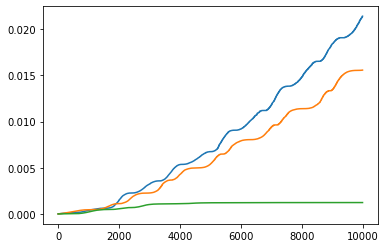

In [27]:
path_length = sim.path_length(order=1,power=2)
plt.plot([(i + 1) for i in range(path_length.shape[0])], path_length)
# plt.xscale("log")

In [187]:
sim.regret_recorders["swap"]()[:,-1]

array([70.22869913, 11.00938899, 81.93053661])

In [132]:
mg.weight

array([[[[0.38725044, 0.34240753, 0.02810337],
         [0.55074954, 0.60687508, 0.69976101],
         [0.59657795, 0.46950552, 0.27485584]],

        [[0.09728714, 0.60672773, 0.54360432],
         [0.26454208, 0.25278358, 0.50165633],
         [0.04169336, 0.11747752, 0.49429097]],

        [[0.77173717, 0.86346229, 0.3505611 ],
         [0.35594837, 0.31400333, 0.64525392],
         [0.55258491, 0.53210521, 0.04410721]]],


       [[[0.73805032, 0.30159735, 0.84759458],
         [0.04005955, 0.11278326, 0.84749458],
         [0.64340064, 0.04897343, 0.61148755]],

        [[0.35718986, 0.67194212, 0.51199374],
         [0.39911936, 0.94905635, 0.50967383],
         [0.66591209, 0.88617184, 0.55056259]],

        [[0.45704226, 0.90936315, 0.90983527],
         [0.50159104, 0.18228659, 0.30326444],
         [0.3209547 , 0.3873199 , 0.47680925]]],


       [[[0.65115376, 0.47580537, 0.35108451],
         [0.88925328, 0.10580608, 0.90254684],
         [0.09564831, 0.31838851, 0.14622075

In [30]:
np.array([[1,1,4],[5,1,4]])**2

array([[ 1,  1, 16],
       [25,  1, 16]])

In [19]:
0.995 ** 3000

2.9460644069957136e-07

In [4]:
scipy.optimize.minimize

<function scipy.optimize._minimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)>

In [23]:
a = np.array([9,9.2,8,2,4,4])

In [10]:
np.dot(np.array([9,9,8,2,4,4]), a)

80

In [18]:
def f(x: np.ndarray) -> float:
    return -np.log(np.maximum(x, 1e-9)).sum() - np.dot(a, x)

In [24]:
scipy.optimize.minimize(f, np.ones(a.shape) / a.shape[0], bounds=[(0,1)]*a.shape[0], constraints=scipy.optimize.LinearConstraint(np.ones(a.shape), lb=1, ub=1)).x

array([0.24203388, 0.25410909, 0.19495588, 0.08986568, 0.10952138,
       0.1095141 ])

In [23]:
t = np.array([[1,2,3],[4,5,6]])

In [32]:
np.einsum('ij,i->ij', t, [1,10])

array([[ 1,  2,  3],
       [40, 50, 60]])

In [33]:
np.array([3,4]) * np.array([1,10])

array([ 3, 40])